In [1]:
import sys
if not '../..' in sys.path:
    sys.path.append('../..')
from analysis import analysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, NMF
from analysis import plot
from pathlib import Path

image_path = Path("/Users/spencer/phd/phd/images/methods/")

%matplotlib inline

### This is a comparison of NMF and PCA, to build intuition about explained variance of these different data subspaces

In [2]:
X = np.random.multivariate_normal(mean=np.zeros(shape=(64))+100,cov=np.eye(64)*200,size=(500))
X.shape

(500, 64)

### can we exponentiate the original data, do NMF, then log the NMF components?

In [3]:
def set_largest_aspect(ax):
    xlims, ylims = ax.get_xlim(),ax.get_ylim()
    new_lims = (np.min(xlims + ylims),np.max(xlims + ylims))
    ax.set_xlim(new_lims)
    ax.set_ylim(new_lims)
    

In [12]:
Y = np.concatenate([np.random.multivariate_normal(mean=[1,0.6],cov=[[0.4,0.1],[0.1,0.1]],size=(500)),
                    np.random.multivariate_normal(mean=[0.6,1],cov=[[0.1,0.1],[0.1,0.4]],size=(500))])

(2, 2)


(0.5775952108133411, 0.5775952108133412, 0.6908694634453223)

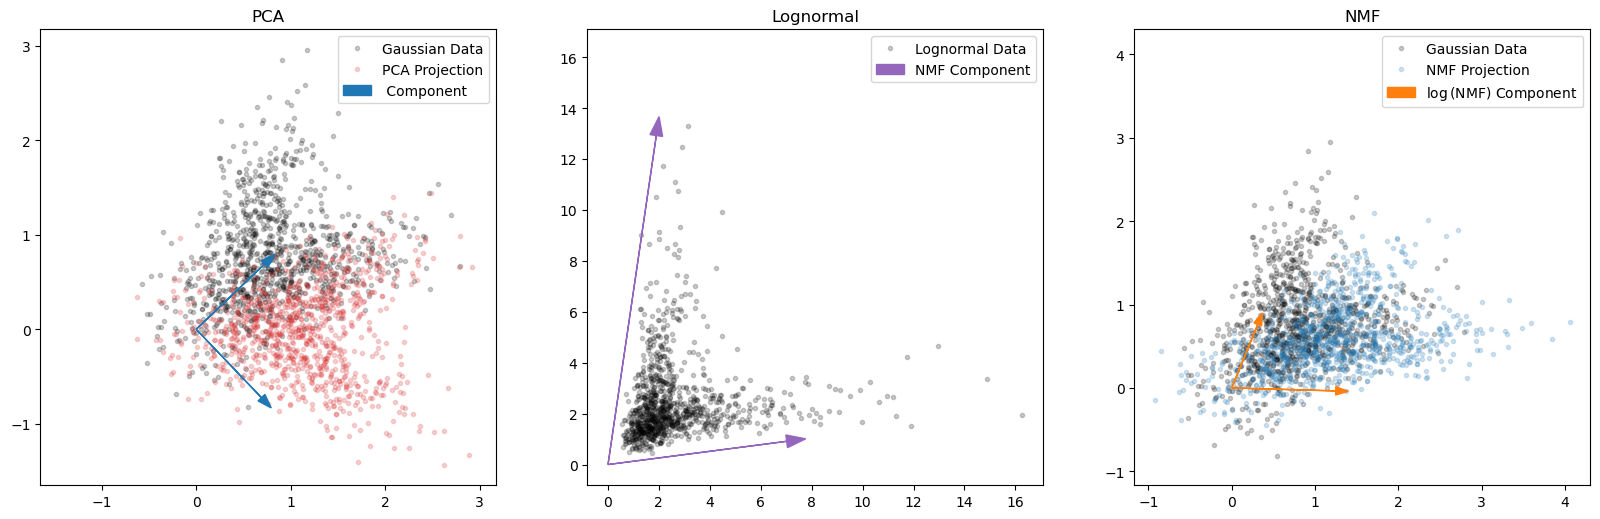

In [13]:
import matplotlib.gridspec as gridspec
import numpy as np

gs = gridspec.GridSpec(1,3, height_ratios=[1])
fig = plt.figure(figsize=(20,9))
fig.tight_layout()
pca_ax = plt.subplot(gs[0])
pca_ax.set_aspect("equal")
exp_ax = plt.subplot(gs[1])
exp_ax.set_aspect("equal")
nmf_ax = plt.subplot(gs[2])
nmf_ax.set_aspect("equal")
pca_ax.set_title("PCA")
exp_ax.set_title("Lognormal")
nmf_ax.set_title("NMF")

pca_ax.plot(Y[:,0],Y[:,1],"ko",markersize=3,label="Gaussian Data",alpha=0.2)
pca = PCA(n_components=2)
pca.fit(Y)
pc = pca.components_
Yp = Y @ pc.T
pca_ax.plot(Yp[:,0],Yp[:,1],"tab:red",marker="o",linestyle="",markersize=3,alpha=0.2,label="PCA Projection")
pca_ax.arrow(0,0,pc[0,0],pc[0,1],color="tab:blue",zorder=100,head_width=0.1,label=" Component")
pca_ax.arrow(0,0,pc[1,0],pc[1,1],color="tab:blue",zorder=100,head_width=0.1)
set_largest_aspect(pca_ax)
pca_ax.legend(loc=1)

Z = np.exp(Y)
nmf = NMF(n_components=2)
nmf.fit(Z)
exp_ax.plot(Z[:,0],Z[:,1],"ko",markersize=3,label="Lognormal Data",alpha=0.2)
exp_ax.arrow(0,0,nmf.components_[1,0],nmf.components_[1,1],color="tab:purple",zorder=100,head_width=0.5,label="NMF Component")
exp_ax.arrow(0,0,nmf.components_[0,0],nmf.components_[0,1],color="tab:purple",zorder=100,head_width=0.5)
xlim = exp_ax.get_xlim()
exp_ax.set_ylim(xlim)
exp_ax.legend(loc=1)

nmf_ax.plot(Y[:,0],Y[:,1],"ko",markersize=3,label="Gaussian Data",alpha=0.2)
c = np.log(nmf.components_)
print(c.shape)
# normalize the variables (the rows)
c /= np.linalg.norm(c,axis=0).reshape(-1,1)
Yn = Y @ c.T
nmf_ax.plot(Yn[:,0],Yn[:,1],"tab:blue",marker="o",linestyle="",markersize=3, alpha=0.2, label="NMF Projection")
nmf_ax.arrow(0,0,c.T[0,0],c.T[0,1],color="tab:orange",zorder=100,head_width=0.1,label="$\log$(NMF) Component")
nmf_ax.arrow(0,0,c.T[1,0],c.T[1,1],color="tab:orange",zorder=100, label="",head_width=0.1)
xlim = nmf_ax.get_xlim()
nmf_ax.set_ylim(xlim)
nmf_ax.legend(loc=1)

np.trace(np.cov(Y.T)), np.trace(np.cov(Yp.T)), np.trace(np.cov(Yn.T))

In [15]:
plot.save_figure(fig,"NMF_PCA_comparison",image_path)

Figure saved to /Users/spencer/phd/phd/images/methods/NMF_PCA_comparison.pdf


The EMG we can think of helpfully as exponentiated gaussians! So it looks more like the first figure, a mean-shifted, exponentiated gaussian, when we do NMF.

The second figure shows going back to the "original" space where we've log-transformed the data and the NMF modes. We see how this gives us a nonnegative basis for the data. 

The comparison here is purely illustrative to build an intuition for NMF and PCA fits, and the lognormal transform. 

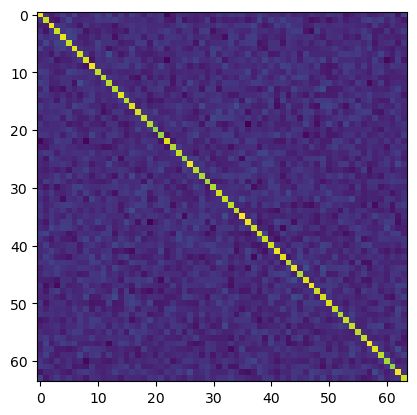

In [53]:
plt.imshow(np.cov(X.T))

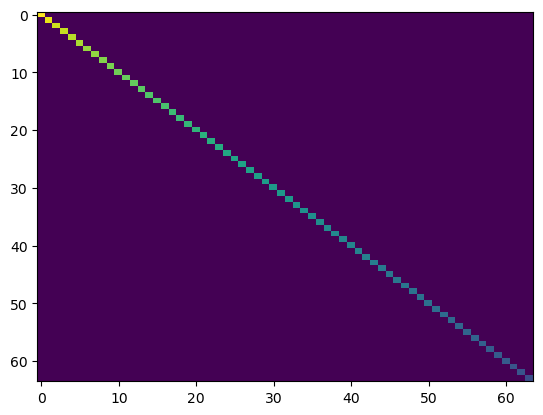

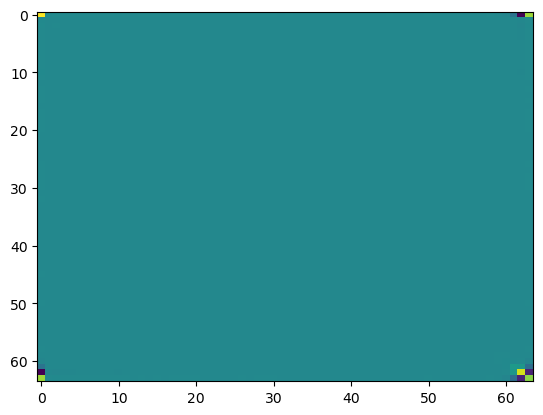

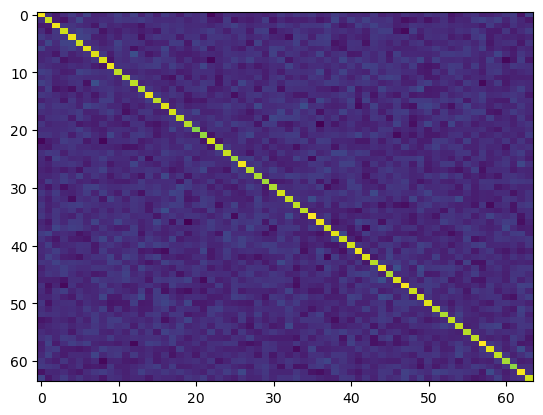

In [143]:
pca = PCA(n_components=64)
nmf = NMF(n_components=64)
P = pca.fit_transform(X)
N = nmf.fit_transform(X)
plt.imshow(np.cov(P.T),aspect="auto")
plt.figure()
plt.imshow(np.cov(N.T),aspect="auto")
plt.figure()
plt.imshow(np.cov(X.T),aspect="auto")

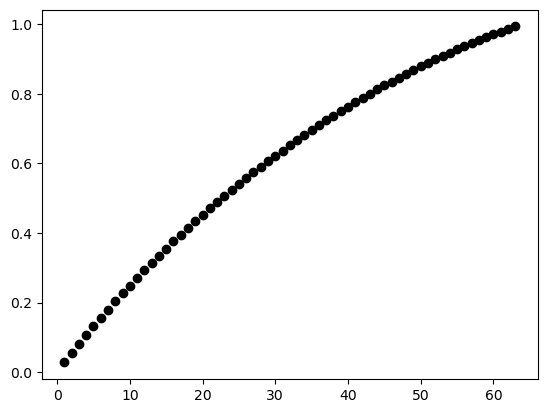

In [65]:
for i in range(1,64):
    pca = PCA(n_components=i)
    pca.fit(X)
    plt.plot(i,analysis.variance_fraction_of_projection(pca.components_, X),"ko")